# Testing and running simulatons

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm
import random
from collections import Counter, defaultdict
from scipy import integrate
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import tqdm
import matplotlib.ticker as ticker
from sklearn.metrics import r2_score
import scipy
from sklearn.linear_model import LinearRegression
import time

from simulation.SEIR_model import SEIRModel
from simulation.model_output import SEIRModelOutput
from simulation.error_model import NaiveErrorModel

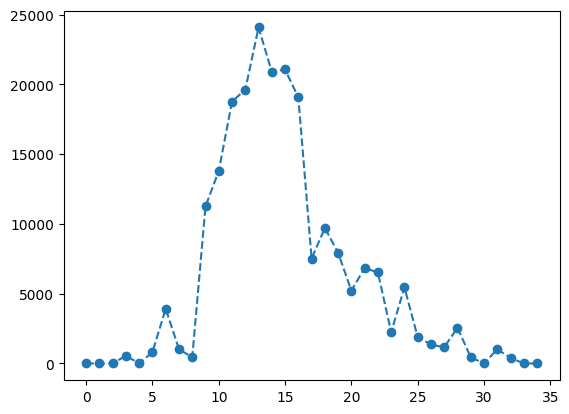

In [11]:
data = pd.read_csv('./data/wave_2014-2015_spb.csv', sep='\t', index_col=0)
weekly_incidence_data = data['total_cases'].to_numpy()[18:-6]
plt.plot(weekly_incidence_data, '--o')

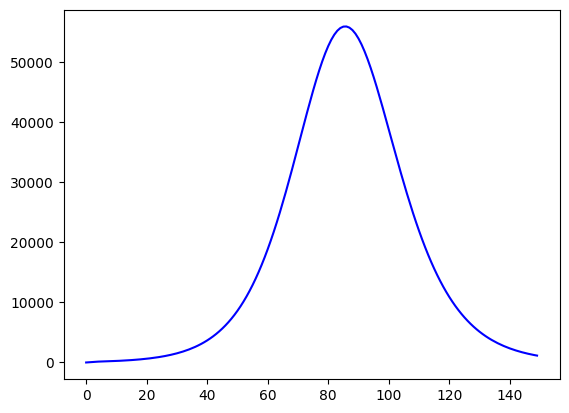

In [12]:
model = SEIRModel(population=5*1e6)
R_0 = 2

t_incubation = 2 # in days
t_infective = 4 # in days

alpha = 1/t_incubation
gamma = 1/t_infective
beta = gamma*R_0
init_inf_frac = 0.0001
init_rec_frac = 0.2
tmax = 150 # days

res = model.simulate(alpha=alpha, beta=beta, gamma=gamma, init_inf_frac=init_inf_frac, init_rec_frac=init_rec_frac)

plt.plot(res.daily_incidence, color='blue', alpha=1)

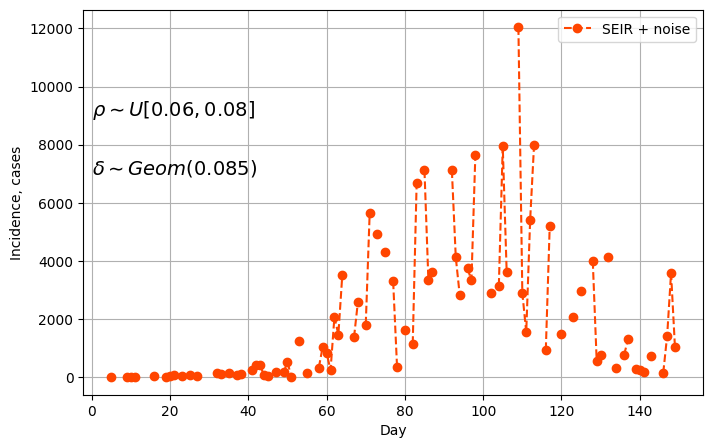

In [13]:
error_model = NaiveErrorModel(res.daily_incidence, mean_delay=1/11.8, mean_underreporting=0.06)
error_model.add_noise()
fig, ax = plt.subplots(figsize=(8, 5))
ax.text(0, 7000, r'$\delta \sim Geom(0.085)$', fontsize=14)
ax.text(0, 9000, r'$\rho \sim U[0.06, 0.08]$', fontsize=14)
# ax.plot(res.daily_incidence, color='RoyalBlue', lw=3, label='SEIR')
ax.plot(error_model.incidence_arr, '--o', color='OrangeRed', label='SEIR + noise')

ax.set_xlabel('Day')
ax.set_ylabel('Incidence, cases')
ax.legend()
ax.grid()
fig.savefig('./figures/report_rscf_seir_only_noise.pdf', bbox_inches='tight')
fig.savefig('./figures/report_rscf_seir_only_noise.png', dpi=600, 
            bbox_inches='tight')

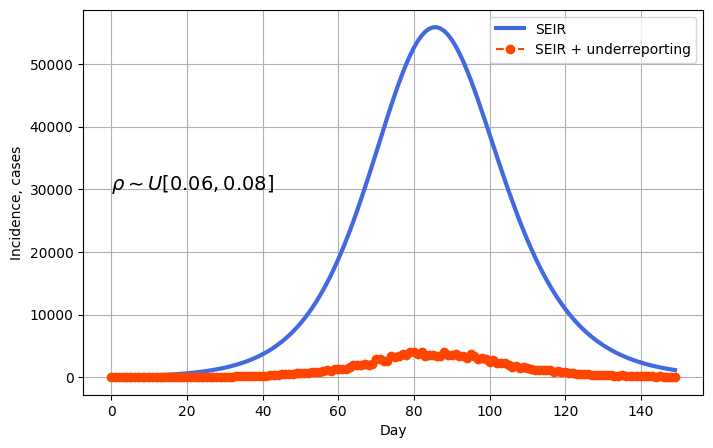

In [14]:
error_model = NaiveErrorModel(res.daily_incidence, mean_delay=1/11.8, mean_underreporting=0.06)
error_model.add_underreporting()
fig, ax = plt.subplots(figsize=(8, 5))
# ax.text(0, 25000, r'$\delta \sim Geom(0.085)$', fontsize=14)
ax.text(0, 30000, r'$\rho \sim U[0.06, 0.08]$', fontsize=14)
ax.plot(res.daily_incidence, color='RoyalBlue', lw=3, label='SEIR')
ax.plot(error_model.incidence_arr, '--o', color='OrangeRed', label='SEIR + underreporting')

ax.set_xlabel('Day')
ax.set_ylabel('Incidence, cases')
ax.legend()
ax.grid()
fig.savefig('./figures/report_rscf_seir_only_underreporting.pdf', bbox_inches='tight')
fig.savefig('./figures/report_rscf_seir_only_underreporting.png', dpi=600, 
            bbox_inches='tight')

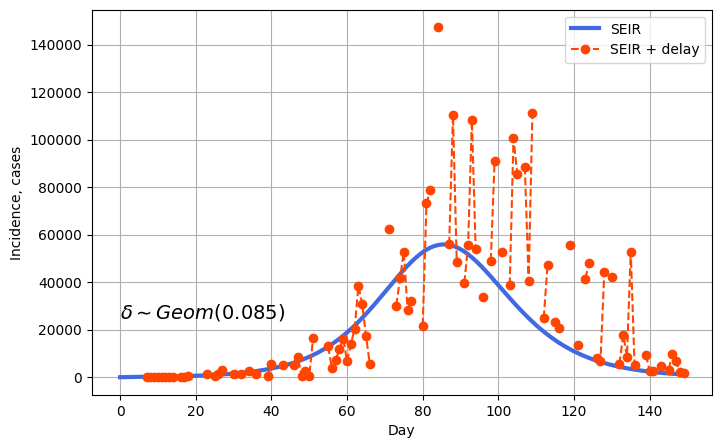

In [15]:
error_model = NaiveErrorModel(res.daily_incidence, mean_delay=1/11.8, mean_underreporting=0.06)
error_model.add_delay()
fig, ax = plt.subplots(figsize=(8, 5))
ax.text(0, 25000, r'$\delta \sim Geom(0.085)$', fontsize=14)
# ax.text(0, 30000, r'$\rho \sim U[0.06, 0.08]$', fontsize=14)
ax.plot(res.daily_incidence, color='RoyalBlue', lw=3, label='SEIR')
ax.plot(error_model.incidence_arr, '--o', color='OrangeRed', label='SEIR + delay')

ax.set_xlabel('Day')
ax.set_ylabel('Incidence, cases')
ax.legend()
ax.grid()
fig.savefig('./figures/report_rscf_seir_only_delay.pdf', bbox_inches='tight')
fig.savefig('./figures/report_rscf_seir_only_delay.png', dpi=600, 
            bbox_inches='tight')

  0%|          | 0/4 [00:00<?, ?it/s]

100%|██████████| 4/4 [00:02<00:00,  1.53it/s]


Text(0.5, 1.0, '$R_0 \\in [$1.0, 1.5$]$, $\\tau (inc.) \\in [$1, 4$]$,$\\tau (inf.) \\in [$4, 8$]$, immune fraction $\\in [$0.01, 0.2$]$')

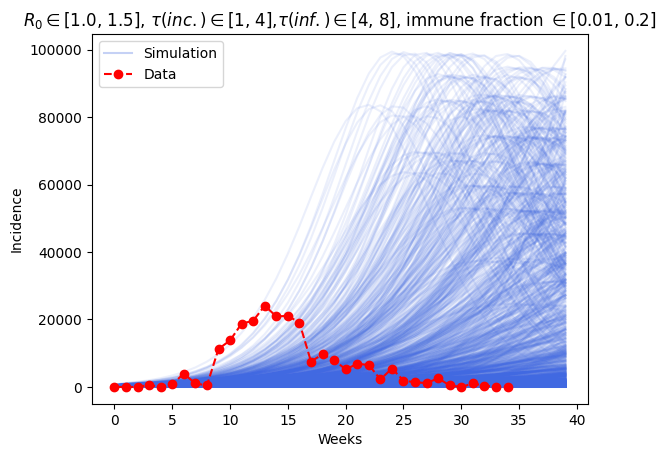

In [24]:
MAX_INCIDENCE_LIMITATION = 1e5

for t_incubation in tqdm.tqdm(t_incubation_arr):
    for t_infective in t_infective_arr:
        for R_0 in R_0_arr:
            for init_rec_frac in init_rec_frac_arr:
                for init_inf_frac in init_inf_frac_arr:
                    alpha = 1/t_incubation
                    gamma = 1/t_infective
                    beta = gamma*R_0
                    res = model.simulate(alpha=alpha, beta=beta, gamma=gamma, 
                                        init_inf_frac=init_inf_frac, 
                                        init_rec_frac=init_rec_frac, tmax=tmax)
                    if (res.weekly_incidence < MAX_INCIDENCE_LIMITATION).all():
                        plt.plot(res.weekly_incidence, color='RoyalBlue', alpha=0.1)
res = model.simulate(alpha=alpha, beta=beta, gamma=gamma, 
                                     init_inf_frac=0, 
                                     init_rec_frac=init_rec_frac, tmax=tmax)
plt.plot(res.weekly_incidence, color='RoyalBlue', alpha=0.3, label='Simulation')
plt.plot(weekly_incidence_data, '--o', color='red', label='Data')    
plt.xlabel('Weeks')
plt.ylabel('Incidence')
plt.legend()
plt.title(r'$R_0 \in [${}, {}$]$, $\tau (inc.) \in [${}, {}$]$,$\tau (inf.) \in [${}, {}$]$, immune fraction $\in [${}, {}$]$'.format(R_0_arr[0], R_0_arr[-1],
                                               t_incubation_arr[0], t_incubation_arr[-1],
                                               t_infective_arr[0], t_infective_arr[-1],
                                               init_rec_frac_arr[0], init_rec_frac_arr[-1]))

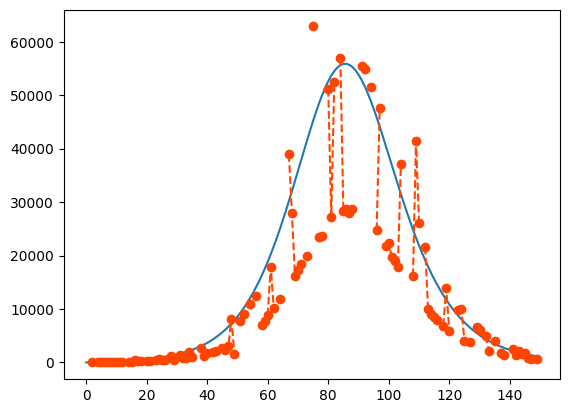

In [16]:
error_model = NaiveErrorModel(res.daily_incidence, mean_delay=0.5, mean_underreporting=0.5)
error_model.add_noise()
data = error_model.incidence_arr
plt.plot(res.daily_incidence)
plt.plot(data, '--o', color='OrangeRed')

  0%|          | 0/50 [00:03<?, ?it/s]


KeyboardInterrupt: 

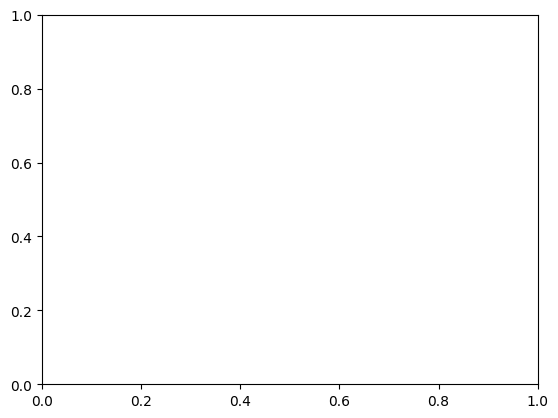

In [17]:
fig, ax = plt.subplots()

# R_0 = 2

# t_incubation = 2 # in days
# t_infective = 4 # in days

# alpha = 1/t_incubation
# gamma = 1/t_infective
# beta = gamma*R_0
# init_inf_frac = 0.0001
# init_rec_frac = 0.2
# tmax = 150 # days

t_incubation_arr = np.arange(1, 5)
t_infective_arr = np.arange(4, 9)
R_0_arr = np.linspace(1, 2.5, 5)
init_inf_frac_arr = np.linspace(1e-6, 1e-4, 5)
init_rec_frac_arr = np.linspace(1e-2, 2e-1, 5)

mean_delay_arr = np.linspace(0.01, 1, 50)
params_found_arr = []
r2_score_arr = []
data_arr=[]
sim_arr=[]
for mean_delay in tqdm.tqdm(mean_delay_arr):
    error_model = NaiveErrorModel(res.daily_incidence, 
                                  mean_delay=mean_delay, 
                                  mean_underreporting=0.5)
    error_model.add_noise()
    data = error_model.incidence_arr
    data_arr.append(data)
    # ax.plot(data, '-o', color='OrangeRed')
    not_none_value_indices = [i for i, x in enumerate(data) if x is not None]

    def AnnealingModel(x):
        alpha, R_0, gamma, init_inf_frac, init_rec_frac = x
        sim = model.simulate(alpha=alpha, beta=gamma*R_0, gamma=gamma, 
                            init_inf_frac=init_inf_frac, init_rec_frac=init_rec_frac, 
                            tmax=tmax)
        daily_incidence_sim = sim.daily_incidence
        # ax.plot(daily_incidence_sim, color='RoyalBlue', alpha=0.3)
        return -r2_score(np.array(daily_incidence_sim)[not_none_value_indices], 
                        np.array(data)[not_none_value_indices])
    
    lw = [1/t_incubation_arr[-1], R_0_arr[0], 1/t_infective_arr[-1],  init_inf_frac_arr[0], init_rec_frac_arr[0]]
    up = [1/t_incubation_arr[0], R_0_arr[-1], 1/t_infective_arr[0], init_inf_frac_arr[-1], init_rec_frac_arr[-1]]
    ret = scipy.optimize.dual_annealing(AnnealingModel, bounds=list(zip(lw, up)))
    
    alpha, R_0, gamma, init_inf_frac, init_rec_frac = ret.x
    sim = model.simulate(alpha=alpha, beta=gamma*R_0, gamma=gamma, 
                    init_inf_frac=init_inf_frac, init_rec_frac=init_rec_frac, 
                    tmax=tmax)
    sim_arr.append(sim.daily_incidence)
    # print('R^2=', -ret.fun)
    r2_score_arr.append(-ret.fun)
    params_found_arr.append(ret.x)

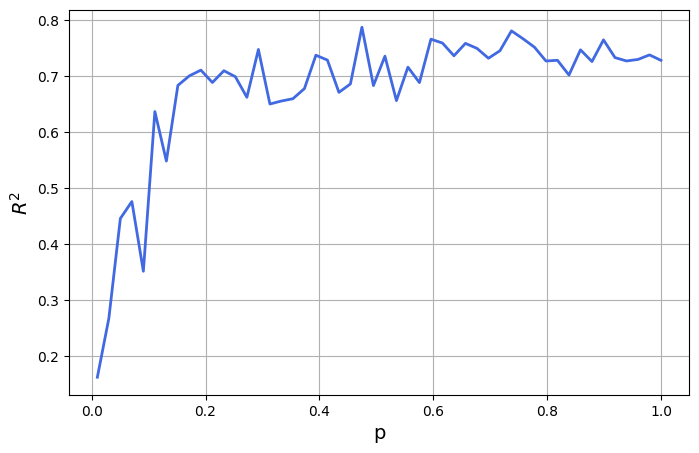

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(mean_delay_arr, r2_score_arr, lw=2, color='RoyalBlue')
ax.set_xlabel('p', fontsize=14)
ax.set_ylabel(r'$R^2$', fontsize=14)

ax.grid()
fig.savefig('./figures/report_rscf_error_model_r2_score_on_mean_delay.pdf', bbox_inches='tight')
fig.savefig('./figures/report_rscf_error_model_r2_score_on_mean_delay.png', 
            bbox_inches='tight', dpi=600)

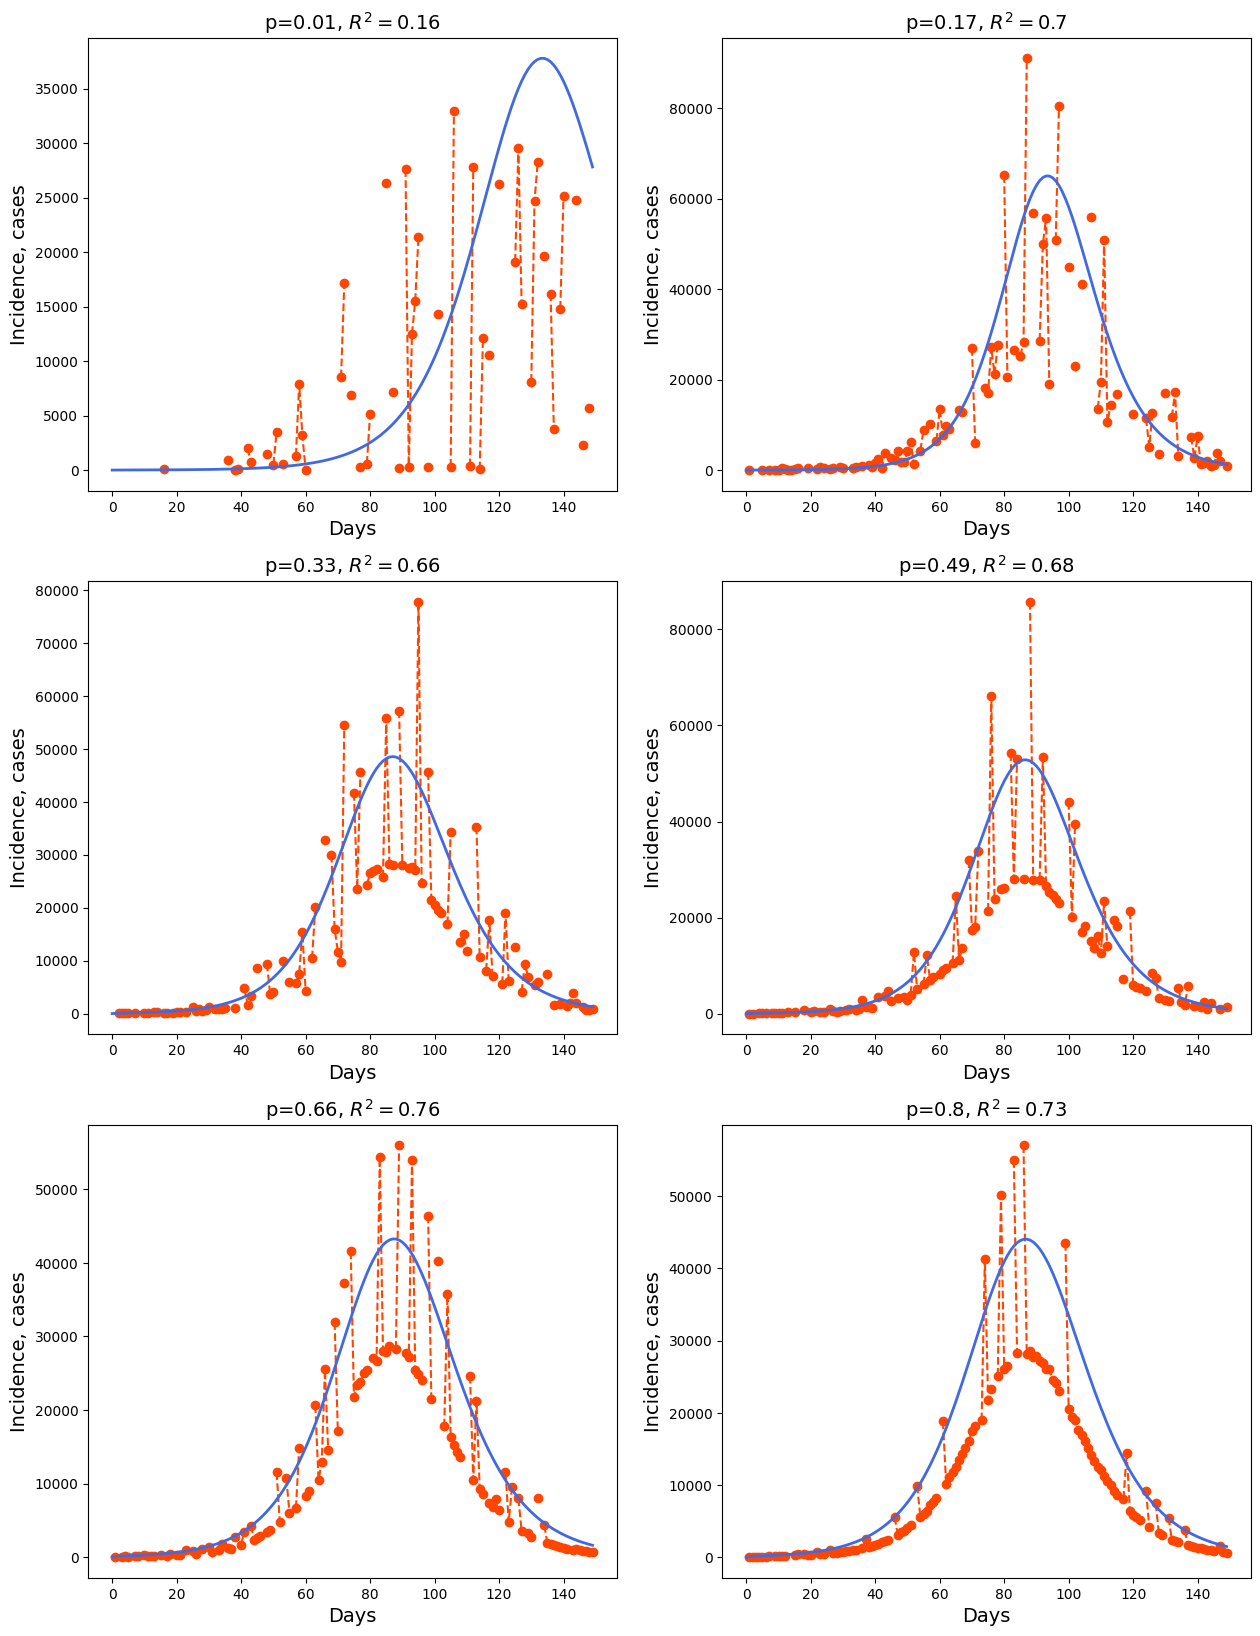

In [8]:
data_to_plot = [data_arr[i] for i in [0, 8, 16, 24, 32, 39]]  # Example: uniform sampling
sim_to_plot = [sim_arr[i] for i in [0, 8, 16, 24, 32, 39]]
mean_delay_to_plot = [mean_delay_arr[i] for i in [0, 8, 16, 24, 32, 39]]
r2_score_arr_to_plot = [r2_score_arr[i] for i in [0, 8, 16, 24, 32, 39]]

fig, axs = plt.subplots(3, 2, figsize=(15, 20))
axs = axs.ravel()

for data, sim, mean_delay, r2_score, ax in zip(data_to_plot, sim_to_plot, 
                                               mean_delay_to_plot, r2_score_arr_to_plot,
                                               axs):
    ax.plot(data, '--o', color='OrangeRed')
    ax.plot(sim, color='RoyalBlue', lw=2)
    ax.set_title(r'p={}, $R^2=${}'.format(round(mean_delay, 2), round(r2_score, 2)),
                 fontsize=14)
    ax.set_xlabel('Days', fontsize=14)
    ax.set_ylabel('Incidence, cases', fontsize=14)

fig.savefig('./figures/rscf_report_error_model_subplots_different_mean_delay.pdf', 
            bbox_inches='tight')
fig.savefig('./figures/rscf_report_error_model_subplots_different_mean_delay.png', 
            bbox_inches='tight', dpi=600)

100%|██████████| 20/20 [55:39<00:00, 166.99s/it]


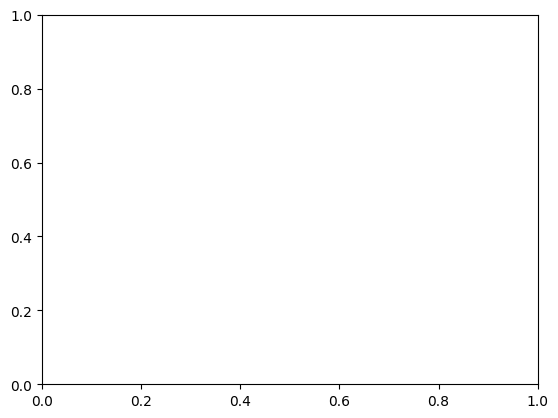

In [18]:
fig, ax = plt.subplots()

t_incubation_arr = np.arange(1, 5)
t_infective_arr = np.arange(4, 9)
R_0_arr = np.linspace(1, 2.5, 5)
init_inf_frac_arr = np.linspace(1e-6, 1e-4, 5)
init_rec_frac_arr = np.linspace(1e-2, 2e-1, 5)

mean_delay_arr = np.linspace(0.01, 1, 20)
mean_underreporting_arr = np.linspace(0.01, 1, 20)
params_found_arr = []
r2_score_arr = []
data_arr=[]
sim_arr=[]

for mean_underreporting in tqdm.tqdm(mean_underreporting_arr):
    r2_score_current = []
    for mean_delay in mean_delay_arr:
        error_model = NaiveErrorModel(res.daily_incidence, 
                                    mean_delay=mean_delay, 
                                    mean_underreporting=mean_underreporting)
        error_model.add_noise()
        data = error_model.incidence_arr
        data_arr.append(data)
        # ax.plot(data, '-o', color='OrangeRed')
        not_none_value_indices = [i for i, x in enumerate(data) if x is not None]

        def AnnealingModel(x):
            alpha, R_0, gamma, init_inf_frac, init_rec_frac = x
            sim = model.simulate(alpha=alpha, beta=gamma*R_0, gamma=gamma, 
                                init_inf_frac=init_inf_frac, init_rec_frac=init_rec_frac, 
                                tmax=tmax)
            daily_incidence_sim = sim.daily_incidence
            # ax.plot(daily_incidence_sim, color='RoyalBlue', alpha=0.3)
            return -r2_score(np.array(daily_incidence_sim)[not_none_value_indices], 
                            np.array(data)[not_none_value_indices])
        
        lw = [1/t_incubation_arr[-1], R_0_arr[0], 1/t_infective_arr[-1],  init_inf_frac_arr[0], init_rec_frac_arr[0]]
        up = [1/t_incubation_arr[0], R_0_arr[-1], 1/t_infective_arr[0], init_inf_frac_arr[-1], init_rec_frac_arr[-1]]
        ret = scipy.optimize.dual_annealing(AnnealingModel, bounds=list(zip(lw, up)))
        
        alpha, R_0, gamma, init_inf_frac, init_rec_frac = ret.x
        sim = model.simulate(alpha=alpha, beta=gamma*R_0, gamma=gamma, 
                        init_inf_frac=init_inf_frac, init_rec_frac=init_rec_frac, 
                        tmax=tmax)
        sim_arr.append(sim.daily_incidence)
        # print('R^2=', -ret.fun)
        r2_score_current.append(-ret.fun)
        params_found_arr.append(ret.x)
    r2_score_arr.append(r2_score_current)

In [19]:
np.save('my_array.npy', r2_score_arr)

Text(0, 0.5, 'Underreporting parameter ($\\rho$)')

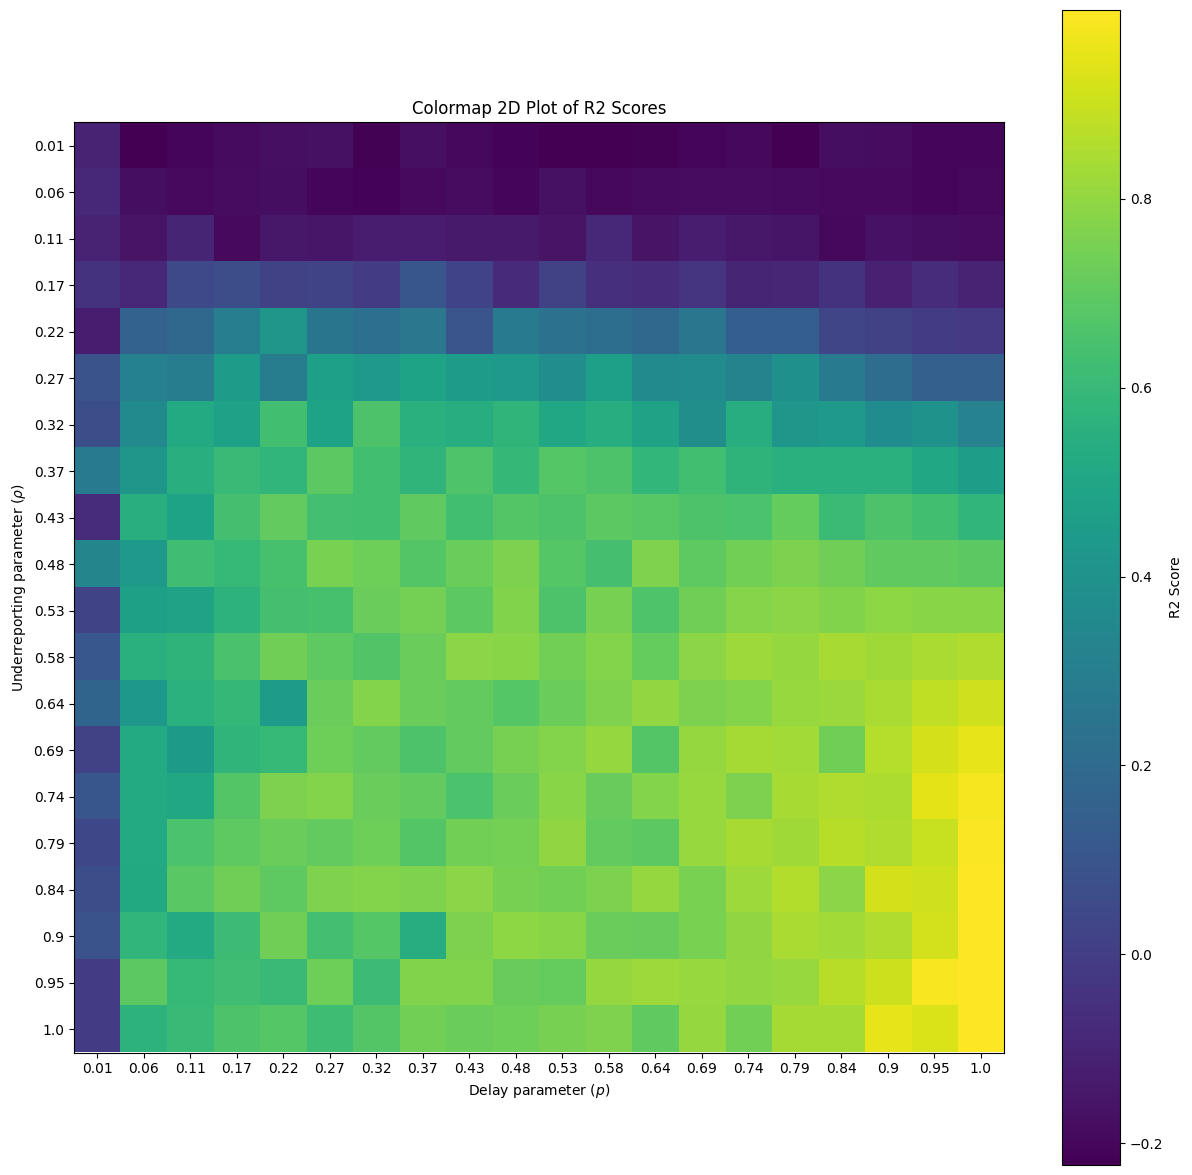

In [34]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(15, 15))

ax.set_xticks(ticks=np.arange(len(mean_delay_arr)), labels=[round(elem, 2) for elem in mean_delay_arr])
ax.set_yticks(ticks=np.arange(len(mean_underreporting_arr)), labels=[round(elem, 2) for elem in mean_underreporting_arr])

r2_score_numpy_arr = np.array(r2_score_arr)
norm = mpl.colors.Normalize(vmin=0, vmax=1)

im = ax.imshow(r2_score_numpy_arr, cmap='viridis', interpolation='nearest')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('R2 Score')
ax.set_title('Colormap 2D Plot of R2 Scores')
ax.set_xlabel(r'Delay parameter ($p$)')
ax.set_ylabel(r'Underreporting parameter ($\rho$)')

In [ ]:
alpha=1/2, beta=1/3*1.5, gamma=1/7, init_inf_frac=1e-4, init_rec_frac=0.15